In [52]:
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Accident_Information.csv')

In [3]:
df2 = pd.read_csv('Vehicle_Information.csv', encoding = 'latin')

In [76]:
df = pd.merge(df1, df2, how = 'inner', on = 'Accident_Index')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058408 entries, 0 to 2058407
Data columns (total 57 columns):
Accident_Index                                 object
1st_Road_Class                                 object
1st_Road_Number                                float64
2nd_Road_Class                                 object
2nd_Road_Number                                float64
Accident_Severity                              object
Carriageway_Hazards                            object
Date                                           object
Day_of_Week                                    object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                               object
Junction_Detail                                object
Latitude                                       float64
Light_Conditions                               object
Local_Authority_(District)                     object
Local_Authority_(Highway)                      object
Location_Easting_OS

In [78]:
df['Hour'] = df.Time.str.slice(0,2)
df['Month'] = df.Date.str.slice(3,5)

In [79]:
df.drop(columns= ['Time','Date','Accident_Index',
                  'Location_Easting_OSGR', 
                  'Location_Northing_OSGR',
                 'InScotland','Longitude','Latitude',
                 'Police_Force','LSOA_of_Accident_Location',
                'Did_Police_Officer_Attend_Scene_of_Accident'],inplace = True)

In [46]:
nominal_cols = []
numerical_cols = []
for col in df.columns:
    if df[col].dtype == 'O':
        nominal_cols.append(col)
    else:
        numerical_cols.append(col)

In [80]:
df.isna().sum()

1st_Road_Class                                  0
1st_Road_Number                                 1
2nd_Road_Class                             827937
2nd_Road_Number                             18927
Accident_Severity                               0
Carriageway_Hazards                             0
Day_of_Week                                     0
Junction_Control                                0
Junction_Detail                                 0
Light_Conditions                                0
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
Number_of_Casualties                            0
Number_of_Vehicles                              0
Pedestrian_Crossing-Human_Control             654
Pedestrian_Crossing-Physical_Facilities      1370
Road_Surface_Conditions                         0
Road_Type                                       0
Special_Conditions_at_Site                      0
Speed_limit                                    65


In [81]:
df.dropna(subset = ['1st_Road_Number',
                   'Pedestrian_Crossing-Human_Control',
                   'Pedestrian_Crossing-Physical_Facilities',
                   'Special_Conditions_at_Site',
                   'Vehicle_Location.Restricted_Lane',
                   'Hour','Speed_limit','2nd_Road_Number'],inplace = True)

In [82]:
df.isna().sum()

1st_Road_Class                                  0
1st_Road_Number                                 0
2nd_Road_Class                             808059
2nd_Road_Number                                 0
Accident_Severity                               0
Carriageway_Hazards                             0
Day_of_Week                                     0
Junction_Control                                0
Junction_Detail                                 0
Light_Conditions                                0
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
Number_of_Casualties                            0
Number_of_Vehicles                              0
Pedestrian_Crossing-Human_Control               0
Pedestrian_Crossing-Physical_Facilities         0
Road_Surface_Conditions                         0
Road_Type                                       0
Special_Conditions_at_Site                      0
Speed_limit                                     0


In [83]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values="NaN", strategy="mean" )
df['Engine_Capacity_.CC.'] = imp.fit_transform(df[["Engine_Capacity_.CC."]])
df['Driver_IMD_Decile'] = imp.fit_transform(df[["Driver_IMD_Decile"]])
df['Age_of_Vehicle'] = imp.fit_transform(df[["Age_of_Vehicle"]])

In [84]:
df['2nd_Road_Class'].value_counts()

Unclassified    824649
A               208030
C                96124
B                82233
Motorway         16387
A(M)              1740
Name: 2nd_Road_Class, dtype: int64

In [85]:
df['make'].value_counts()

VAUXHALL          225753
FORD              224370
PEUGEOT           118746
VOLKSWAGEN        116411
RENAULT           105649
                   ...  
SUZUKO                 1
MORINI                 1
ZHONGYU                1
JUNGHEINRICH           1
CLASSIC CUSTOM         1
Name: make, Length: 526, dtype: int64

In [86]:
df['model'].value_counts()

MISSING                        11764
CLIO DYNAMIQUE 16V              7377
PUNTO ACTIVE                    4994
KA                              4444
206 LX                          4229
                               ...  
ACCORD AERODECK GX                 1
740D XDRIVE M SPORT AUTO           1
SHARAN S BLUEMOTION TECH TD        1
METRO RED HOT                      1
C30 R-DESIGN D4 AUTO               1
Name: model, Length: 35285, dtype: int64

In [87]:
df['Propulsion_Code'].value_counts()

Petrol                 1061687
Heavy oil               732543
Hybrid electric           9088
Gas/Bi-fuel               1574
Petrol/Gas (LPG)           613
Electric                   592
Gas                        154
Electric diesel            143
New fuel technology         11
Gas Diesel                   7
Steam                        3
Fuel cells                   1
Name: Propulsion_Code, dtype: int64

In [88]:
df['2nd_Road_Class'].fillna('Unclassified',inplace = True)
df['make'].fillna('unknown',inplace = True)
df['model'].fillna('MISSING',inplace = True)
df['Propulsion_Code'].fillna('Petrol',inplace = True)

In [89]:
df.isna().sum()

1st_Road_Class                             0
1st_Road_Number                            0
2nd_Road_Class                             0
2nd_Road_Number                            0
Accident_Severity                          0
Carriageway_Hazards                        0
Day_of_Week                                0
Junction_Control                           0
Junction_Detail                            0
Light_Conditions                           0
Local_Authority_(District)                 0
Local_Authority_(Highway)                  0
Number_of_Casualties                       0
Number_of_Vehicles                         0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Road_Surface_Conditions                    0
Road_Type                                  0
Special_Conditions_at_Site                 0
Speed_limit                                0
Urban_or_Rural_Area                        0
Weather_Conditions                         0
Year_x    

In [92]:
df['Accident_Severity'].value_counts()

Slight     1747669
Serious     289553
Name: Accident_Severity, dtype: int64

In [91]:
df['Accident_Severity'] = df['Accident_Severity'].replace(['Fatal'],'Serious')

In [93]:
import scipy.stats as ss
from collections import Counter
import math 
from scipy import stats


def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted
    
def conditional_entropy(x, y):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    :param x: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :param y: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :return: float
    """
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

#cramers_v was used to measure correlation between categorical features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True,
                          return_results = True, **kwargs):

    dataset = convert(dataset, 'dataframe')
    columns = dataset.columns
    nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=(20,20))#kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',True), fmt=kwargs.get('fmt','.2f'), cmap='coolwarm')
        plt.show()
    if return_results:
        return corr

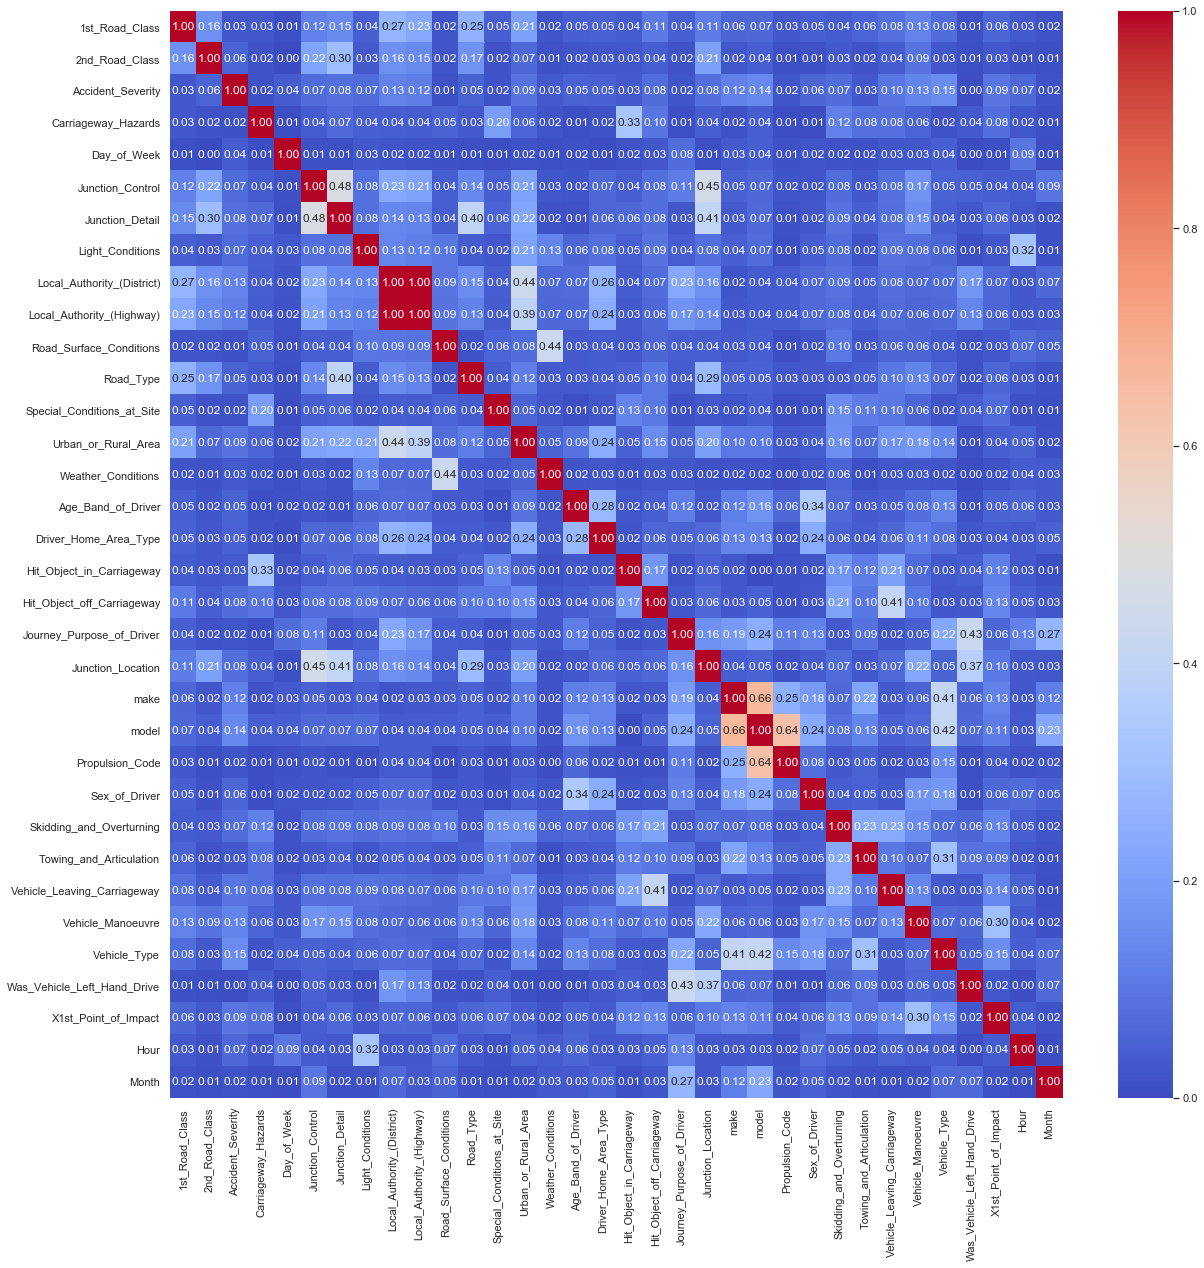

In [94]:
df_nominal = df[nominal_cols]
results = associations(df_nominal,all,mark_columns=False, theil_u=False, plot=True,return_results = True)

In [95]:
results['Accident_Severity'].sort_values(ascending = False)

Accident_Severity              1.000000
Vehicle_Type                   0.151720
model                          0.143658
Vehicle_Manoeuvre              0.131423
Local_Authority_(District)     0.125604
make                           0.123867
Local_Authority_(Highway)      0.115789
Vehicle_Leaving_Carriageway    0.095425
X1st_Point_of_Impact           0.093795
Urban_or_Rural_Area            0.091277
Junction_Detail                0.082231
Junction_Location              0.078879
Hit_Object_off_Carriageway     0.077534
Skidding_and_Overturning       0.074529
Junction_Control               0.074089
Light_Conditions               0.070795
Hour                           0.065417
Sex_of_Driver                  0.061588
2nd_Road_Class                 0.055585
Road_Type                      0.054636
Age_Band_of_Driver             0.054070
Driver_Home_Area_Type          0.049871
Day_of_Week                    0.035728
Hit_Object_in_Carriageway      0.032654
Weather_Conditions             0.031637


In [96]:
le = LabelEncoder()
le.fit_transform(df[['Accident_Severity']])

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
df['Accident_Severity'] = le.fit_transform(df[['Accident_Severity']])

In [98]:
df['Accident_Severity'].value_counts()

1    1747669
0     289553
Name: Accident_Severity, dtype: int64

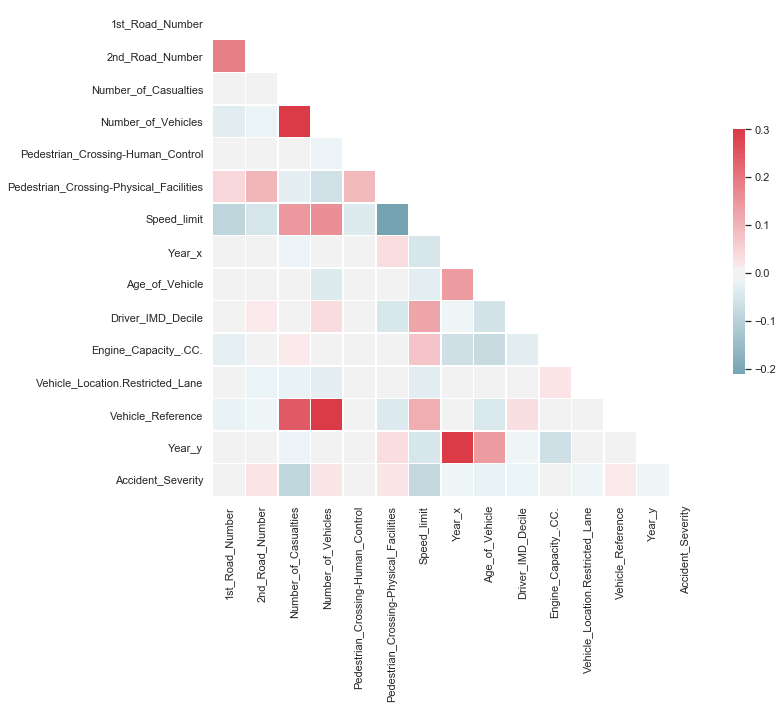

In [99]:
data = df[numerical_cols + ['Accident_Severity']]
corr = data.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [100]:
corr['Accident_Severity'].sort_values(ascending = True)

Number_of_Casualties                      -0.084597
Speed_limit                               -0.081679
Age_of_Vehicle                            -0.019427
Driver_IMD_Decile                         -0.017098
Vehicle_Location.Restricted_Lane          -0.013367
Year_x                                    -0.011910
Year_y                                    -0.011910
Engine_Capacity_.CC.                      -0.007857
1st_Road_Number                           -0.005844
Pedestrian_Crossing-Human_Control          0.003909
Vehicle_Reference                          0.012521
Pedestrian_Crossing-Physical_Facilities    0.019940
Number_of_Vehicles                         0.020119
2nd_Road_Number                            0.021883
Accident_Severity                          1.000000
Name: Accident_Severity, dtype: float64